In [226]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
AOD=[]
import xarray as xr
from netCDF4 import Dataset
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
AOD=[]
import xarray as xr
os.chdir("/home/ybh10/Scripts/")
from my_functions import *
os.chdir("/home/ybh10/Numpy_Array/")
Daily_Stash=load_dict('Daily_Stash_Output.npy')
Monthly_Stash=load_dict('Monthly_Stash_Output.npy')
MODIS_Clim = np.load('MODIS2007_2014.npy')
aod_variables=['atmosphere_optical_thickness_due_to_dust_ambient_aerosol','atmosphere_optical_thickness_due_to_insoluble_aitken_mode_sulphate_aerosol',
'atmosphere_optical_thickness_due_to_soluble_accumulation_mode_sulphate_aerosol','atmosphere_optical_thickness_due_to_soluble_aitken_mode_sulphate_aerosol',
'atmosphere_optical_thickness_due_to_soluble_coarse_mode_sulphate_aerosol']

os.chdir("/nesi/nobackup/niwa02757/ybh10/DMS")
inpath_lana=sorted(glob.glob('Lana/2003/*.nc'))
inpath_medusa=sorted(glob.glob('MEDUSA/2003/*.nc'))
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
vn1=xr.open_dataset('Lana/2003/bx_atmosphere_optical_thickness_due_to_dust_ambient_aerosol_2003_jan.nc')
lat=vn1.latitude
lon=vn1.longitude
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
lat_bnds = [-60, -40]
inpath_modis=sorted(glob.glob('/nesi/nobackup/niwa02757/ybh10/Observational_Data/MODIS/AOD/*.nc'))
latty_o=xr.open_dataset(inpath_modis[0])
lat_o=latty_o['lat']
lon_o=latty_o['lon']

In [284]:
modis_aod=[]
modis_aod_sh=[]
AOD_Ob=[]
AOD_Ob_sh=[]
d=np.arange(0,144,12)
modis=[]
modis_sh=[]
count=-1
upper= np.arange(12,145,12)

for pathway in (inpath_modis):
    lat_inds = np.where((lat_o > lat_bnds[0]) & (lat_o < lat_bnds[1]))
    lat_inds = np.squeeze(lat_inds)
    vn3=xr.open_dataset(pathway)
    modis_num=vn3['MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean'].data
    modis_shemi=vn3.MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]
    modis_aod_sh.append(modis_shemi)
    modis_aod.append(modis_num)
    if pathway.find ('20141231.MONTH_12') !=-1: # Gets the last file in the loop, 
        for x in range(0,12): # 144 files produced, and sorts them to make every 5 file the
            count =count+1 # Same 12 months. E.G. It WAS J,A,S,O. But now its JJJJJJJJJJJJ,AAAAAAAAAAAA,SSSSSSSSSSSS...
            #print(count)
            for i in (d): # The d arange just sorts it every 5 files
              #  print("i+count={}".format(i+count))
             #   print(x)
                a_sh=modis_aod_sh[i+count]
                a=modis_aod[i+count]
                #a_lon=AOD_Obv_Lon[i+count]
                AOD_Ob.append(a)
                AOD_Ob_sh.append(a_sh)
                #AOD_Obby_Lon.append(a_lon)
                if i+count == 143 !=-1: ### The 143 is the last file for it to iterate though, resulting
                    for u in (upper): ## in the loop to go through this bit when it's done above.
                        a_a=AOD_Ob[u-12:u]
                        b_b=AOD_Ob_sh[u-12:u]  
                        ab=np.nanmean(a_a,axis=0) ## This loop gets the mean of all the same months - creating
                        bb=np.nanmean(b_b,axis=0)
                        modis.append(ab) ## a CLIMATOLOGY of 12 years, for each month, 
                        modis_sh.append(bb)
modis=np.array(modis)
modis_sh=np.array(modis_sh)

lat_so=latty_o.lat[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]


<ipython-input-284-5b133cca0c18>:36: RuntimeWarning: Mean of empty slice
  ab=np.nanmean(a_a,axis=0) ## This loop gets the mean of all the same months - creating
<ipython-input-284-5b133cca0c18>:37: RuntimeWarning: Mean of empty slice
  bb=np.nanmean(b_b,axis=0)


MODEL DATA EXTRACTION:
into the 2nd wavelength (550nm), then check_lat_lon to ensure lat runs N-S and lon runs 180W-180E.

In [288]:
lana_aod=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
lana_aod_sh=[]
for mon in (months):
    files=sorted(glob.glob('Lana/2003/*bx_atmosphere_optical_thickness_due_to**{}*.nc'.format(mon)))
    aerosol=0
    aerosol_sh=0
    for x,vari in zip(files,aod_variables):
        lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))
        lat_inds = np.squeeze(lat_inds)
        vn1=xr.open_dataset(x)
        num=vn1[vari].data
        num_sh=vn1[vari][2,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
        aerosol=aerosol+num
        aerosol_sh=aerosol_sh+num_sh
    lana_aod.append(aerosol)
    lana_aod_sh.append(aerosol_sh)
    
lana_aod_sh=np.array(lana_aod_sh)
lana_aod=np.array(lana_aod)
MEDUSA_aod=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
MEDUSA_aod_sh=[]
for mon in (months):
    files=sorted(glob.glob('MEDUSA/2003/*bw_atmosphere_optical_thickness_due_to**{}*.nc'.format(mon)))
    aerosol=0
    aerosol_sh=0
    for x,vari in zip(files,aod_variables):
        vn2=xr.open_dataset(x)
        num=vn2[vari].data
        num_sh=vn2[vari][2,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
        aerosol=aerosol+num
        aerosol_sh=aerosol_sh+num_sh
    MEDUSA_aod.append(aerosol)
    MEDUSA_aod_sh.append(aerosol_sh)
MEDUSA_aod=np.array(MEDUSA_aod)
MEDUSA_aod_sh=np.array(MEDUSA_aod_sh)

lat_m_so=vn2.latitude[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]
MEDUSA_aerosol=MEDUSA_aod[:,2]; lana_aerosol=lana_aod[:,2]
lana_check=check_lat_lon(lat,lon,lana_aerosol); MEDUSA_check=check_lat_lon(lat,lon,MEDUSA_aerosol)
lana_check_sh=check_lat_lon(lat_so,lon,lana_aod_sh); MEDUSA_check_sh=check_lat_lon(lat_so,lon,MEDUSA_aod_sh)

In [289]:
mask1 = np.isnan(modis); mask2 = np.isnan(modis_sh)

In [290]:
lana_aerosol_2_sh=lana_check_sh[2];MEDUSA_aerosol_2_sh=MEDUSA_check_sh[2]

lana_aerosol_2=lana_check[2];MEDUSA_aerosol_2=MEDUSA_check[2]

lats=lana_check[0];lons=lana_check[1]

lats_sh=lana_check_sh[0];lons_sh=lana_check_sh[1]

In [291]:
# CHANGE LAT AND LONS to modis!
lana=my_interpolate(lats,lons,lana_aerosol_2,lat_o,lon_o)
medusa=my_interpolate(lats,lons,MEDUSA_aerosol_2,lat_o,lon_o) #12,180,360)

lana_sh=my_interpolate(lat_m_so,lons,lana_aerosol_2_sh,lat_so,lon_o)
medusa_sh=my_interpolate(lat_m_so,lons,MEDUSA_aerosol_2_sh,lat_so,lon_o) #12,180,360)

medusa[mask1] = np.nan
lana[mask1] = np.nan
medusa_sh[mask2] = np.nan
lana_sh[mask2] = np.nan
medusa_mean=np.nanmean(medusa,axis=0)
lana_mean=np.nanmean(lana,axis=0)
modis_mean=np.nanmean(modis,axis=0)

### MEAN FOR THE MAPS
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aerosol,lat))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aerosol,lat))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis,lat_o))
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]

### MEAN FOR THE SH REGIONAL zonal
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aod_sh,lat_m_so))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aod_sh,lat_m_so))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis_sh,lat_so))
sh_mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]


<ipython-input-291-830084806143>:12: RuntimeWarning: Mean of empty slice
  medusa_mean=np.nanmean(medusa,axis=0)
<ipython-input-291-830084806143>:13: RuntimeWarning: Mean of empty slice
  lana_mean=np.nanmean(lana,axis=0)
<ipython-input-291-830084806143>:14: RuntimeWarning: Mean of empty slice
  modis_mean=np.nanmean(modis,axis=0)


In [292]:
maps=[lana_mean,medusa_mean,modis_mean]
monthly_data=[lana,medusa,modis]
sh_data=[lana_sh,medusa_sh,modis_sh]

In [293]:
RMSE=[]
from math import sqrt
from sklearn.metrics import mean_squared_error

data1= modis; data2 = lana ; data3 = medusa
rms_lana = sqrt(mean_squared_error(data1[~mask1],data2[~mask1]))
rms_medusa = sqrt(mean_squared_error(data1[~mask1],data3[~mask1]))

data1= modis_sh; data2 = lana_sh ; data3 = medusa_sh
rms_lana_sh = sqrt(mean_squared_error(data1[~mask2],data2[~mask2]))
rms_medusa_sh = sqrt(mean_squared_error(data1[~mask2],data3[~mask2]))
RMSE_SH=[rms_lana_sh,rms_medusa_sh,0]

rmse=[rms_lana,rms_medusa,0]


# PLOTS:

## **Lana & MEDUSA & MODIS (2003 - 2014) Aerosol Optical Depth**  


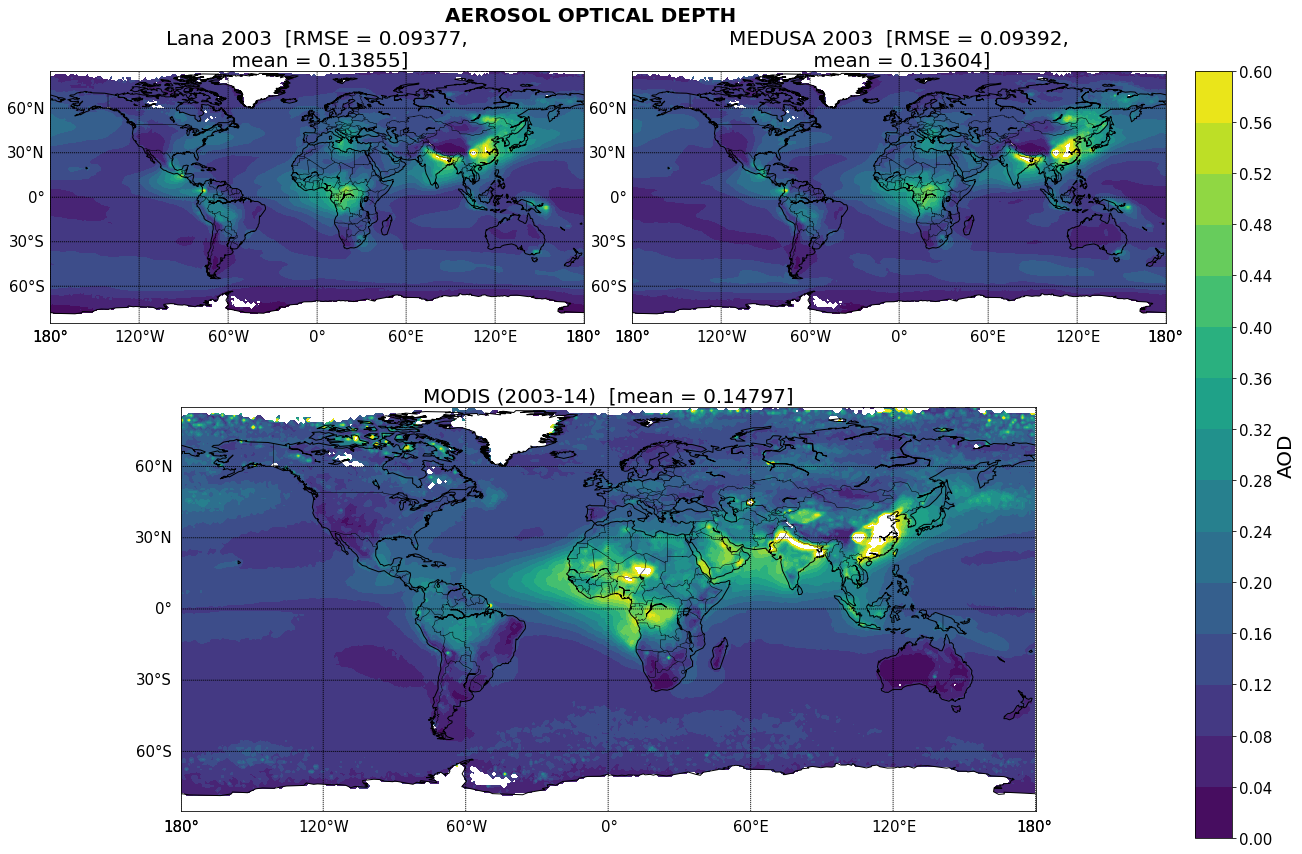

In [26]:
zeros=np.zeros((180,360))
rmse=[rms_lana,rms_medusa,0]
title=['Lana 2003','MEDUSA 2003','MODIS (2003-14)']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.02, wspace=0.09)


ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,(3,4))
cbar_max = 60.0
cbar_min = 0.0
cbar_step = 4.0
axes=[ax,ax1,ax2]
for ax,mapy,rmsey,titl,meany in  zip(axes,maps,rmse,title,mean):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=-180.,llcrnrlat=-85,urcrnrlon=180.,urcrnrlat=85,
                    projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon_o, lat_o) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    clevs=np.arange(0.0,0.60+0.04,0.04)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        ax.contourf(lon_o,lat_o,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(lon_o,lat_o,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
    if titl == 'MODIS (2003-14)':
        cs=ax2.contourf(lon_o,lat_o,mapy,clevs,cmap='viridis')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
cax = fig.add_axes([0.92, 0.1, 0.026, 0.71]) # Left, Bottom, Width, Height

#cbar=fig.colorbar(cs,fraction=0.046, pad=0.04)
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,0.6+0.04,0.04))
        # ax1.set_yticklabels(y_labels)
cbar.set_label('AOD',fontsize=20)
cbar.ax.tick_params(labelsize=15)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle('AEROSOL OPTICAL DEPTH',y=.87,fontsize=20,fontweight='bold')

#cbar.set_ticklabels(np.arange(0,60,4))
plt.show()
#plt.savefig("LANA_and_MEDUSA_AOD",dpi=600,bbox_inches = 'tight')


# **LANA vs MEDUSA difference**  2D-map global view

**Figure 1:**  
The Aerosol Optical Depth map difference between Lana et al., 2011 vs MEDUSA DMS concentration  

**Figure 2:**  
The Aerosol Optical Depth map RELATIVE (%) difference between Lana et al., 2011 vs MEDUSA DMS concentration  

**Figure 3:**  
ZONAL AOD

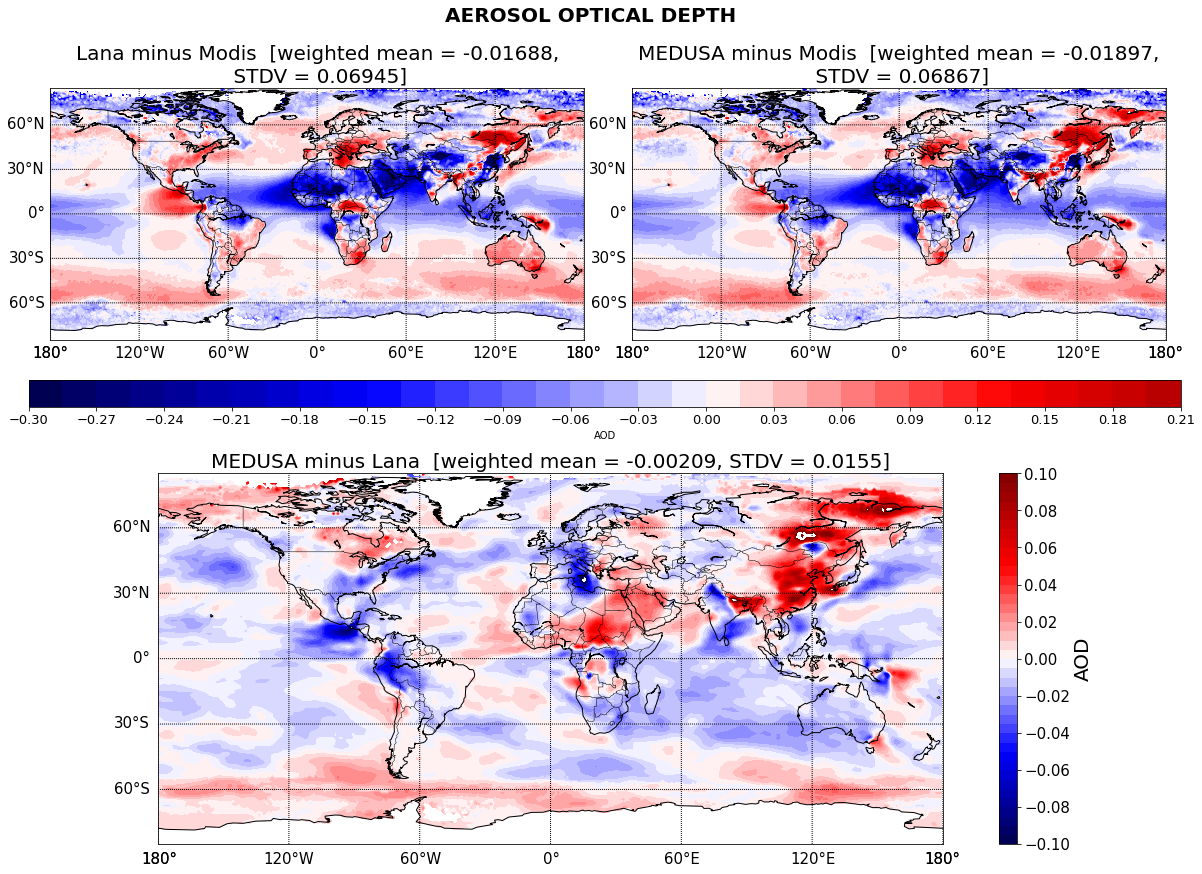

In [27]:
######################## FIGURE 1 ###########################
zeros=np.zeros((180,360))
rmse=[rms_lana,rms_medusa,0,0]
orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.54, stop=.9, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-0.1, midpoint=0.5, stop=0.1, name='shifted')
title=['Lana minus Modis','MEDUSA minus Modis','MEDUSA minus Lana', ]


DMS_diff=medusa_mean-lana_mean; lana_diff=lana_mean-modis_mean; medusa_diff=medusa_mean-modis_mean
diff_maps=[lana_diff,medusa_diff,DMS_diff]

DMS_std=np.nanstd(DMS_diff); lana_std=np.nanstd(lana_diff); medusa_std=np.nanstd(medusa_diff)
diff_std=[lana_std,medusa_std,DMS_std]

lana_dif_mean=areaweight(lana_diff,lat_o); medusa_diff_mean=areaweight(medusa_diff,lat_o); dms_diff_mean=areaweight(DMS_diff,lat_o)
diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.2, wspace=0.09)


ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

for ax,mapy,rmsey,titl,meany,stdv in  zip(axes,diff_maps,rmse,title,diff_mean,diff_std):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=-180.,llcrnrlat=-85,urcrnrlon=180.,urcrnrlat=85,projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon_o, lat_o); lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.); parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines(); map_ax1.drawcountries(); map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    clevs=np.arange(-0.30,0.20+0.015,0.015)

    if titl == 'Lana minus Modis':
        mapy[mapy>0.20]=0.20; mapy[mapy<-0.30]=-0.30
        cs=ax.contourf(lon_o,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax.set_title("{}  [weighted mean = {},\n STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
    if titl == 'MEDUSA minus Modis':
        mapy[mapy>0.20]=0.20; mapy[mapy<-0.30]=-0.30
        ax1.contourf(lon_o,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax1.set_title("{}  [weighted mean = {},\n STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
    if titl == 'MEDUSA minus Lana':
        clevs1=np.arange(-0.10,0.10+0.005,0.005)
        cs1=ax2.contourf(lon_o,lat_o,mapy,clevs1,cmap='seismic')
        ax2.set_title("{}  [weighted mean = {}, STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
#vertical#cax = fig.add_axes([0.92, 0.1, 0.026, 0.71]) # Left, Bottom, Width, Height
cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-0.3,0.2+0.03,0.03))
cbar.ax.tick_params(labelsize=13); cbar.set_label('AOD',fontsize=10)

cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-0.1,0.1+0.02,0.02))
cbar.set_label('AOD',fontsize=20); cbar.ax.tick_params(labelsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH',y=.9,fontsize=20,fontweight='bold')

plt.show()
#plt.savefig("Lana_MEDUSA_Plot_DIFFERENCE_AOD",dpi=600,bbox_inches = 'tight')



RELATIVE DIFFERENCE:
to achieve relative difference, ((model/MODIS)-1)*100 -> this gives a percentage of difference.

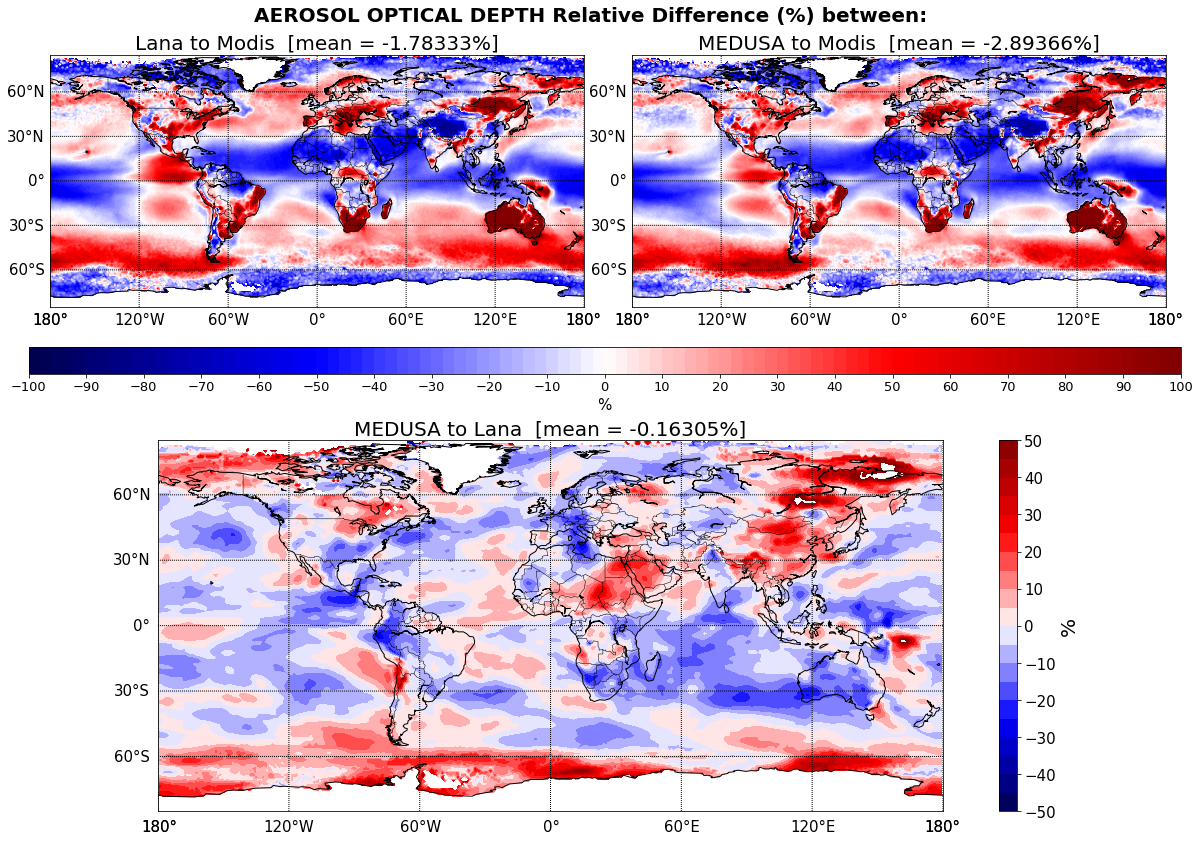

In [28]:
######################## FIGURE 2 ###########################
orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.54, stop=.9, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-0.1, midpoint=0.5, stop=0.1, name='shifted')
title=['Lana to Modis','MEDUSA to Modis','MEDUSA to Lana', ]

lana_rela_diff=((lana_mean/modis_mean)-1)*100
medusa_rela_diff=((medusa_mean/modis_mean)-1)*100
DMS_rela_diff=((medusa_mean/lana_mean)-1)*100

rela_diff_maps=[lana_rela_diff,medusa_rela_diff,DMS_rela_diff]

lana_dif_mean=np.nanmean(lana_rela_diff)
medusa_diff_mean=np.nanmean(medusa_rela_diff)
dms_diff_mean=np.nanmean(DMS_rela_diff)
rela_diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.2, wspace=0.09)

ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,(3,4))

axes=[ax,ax1,ax2]
for ax,mapy,rmsey,titl,meany in  zip(axes,rela_diff_maps,rmse,title,rela_diff_mean):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=-180.,llcrnrlat=-85,urcrnrlon=180.,urcrnrlat=85,
                    projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon_o, lat_o) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    clevs=np.arange(-100,100+2,2)

    if titl == 'Lana to Modis':
        mapy[mapy>100]=100
        mapy[mapy<-100]=-100
        cs=ax.contourf(lon_o,lat_o,mapy,clevs,cmap='seismic')
        ax.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA to Modis':
        mapy[mapy>100]=100
        mapy[mapy<-100]=-100
        ax1.contourf(lon_o,lat_o,mapy,clevs,cmap='seismic')
        ax1.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA to Lana':
        clevs1=np.arange(-50,50+5,5)
        cs1=ax2.contourf(lon_o,lat_o,mapy,clevs1,cmap='seismic')
        ax2.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
#vertical#cax = fig.add_axes([0.92, 0.1, 0.026, 0.71]) # Left, Bottom, Width, Height
cax = fig.add_axes([0.11, 0.53, 0.8, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-100,100+10,10))
cbar.ax.tick_params(labelsize=13)
cbar.set_label('%',fontsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH Relative Difference (%) between:',y=.87,fontsize=20,fontweight='bold')
cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-50,50+10,10))
cbar.set_label('%',fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.show()
#plt.savefig("Lana_MEDUSA_Plot_RELATIVE_DIFFERENCE_AOD",dpi=600,bbox_inches = 'tight')


In [61]:
modis_concatenate=np.concatenate((modis[6:12],modis[0:6])); lana_concatenate=np.concatenate((lana[6:12],lana[0:6]));
medusa_concatenate=np.concatenate((medusa[6:12],medusa[0:6]))

modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);
medusa_zonal=np.nanmean(medusa_concatenate,axis=2)

modis_zonal=modis_zonal.transpose(1,0);lana_zonal=lana_zonal.transpose(1,0);medusa_zonal=medusa_zonal.transpose(1,0);
zonal_figs=[lana_zonal,medusa_zonal,modis_zonal]


<ipython-input-61-0986637bddca>:4: RuntimeWarning: Mean of empty slice
  modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);
<ipython-input-61-0986637bddca>:5: RuntimeWarning: Mean of empty slice
  medusa_zonal=np.nanmean(medusa_concatenate,axis=2)


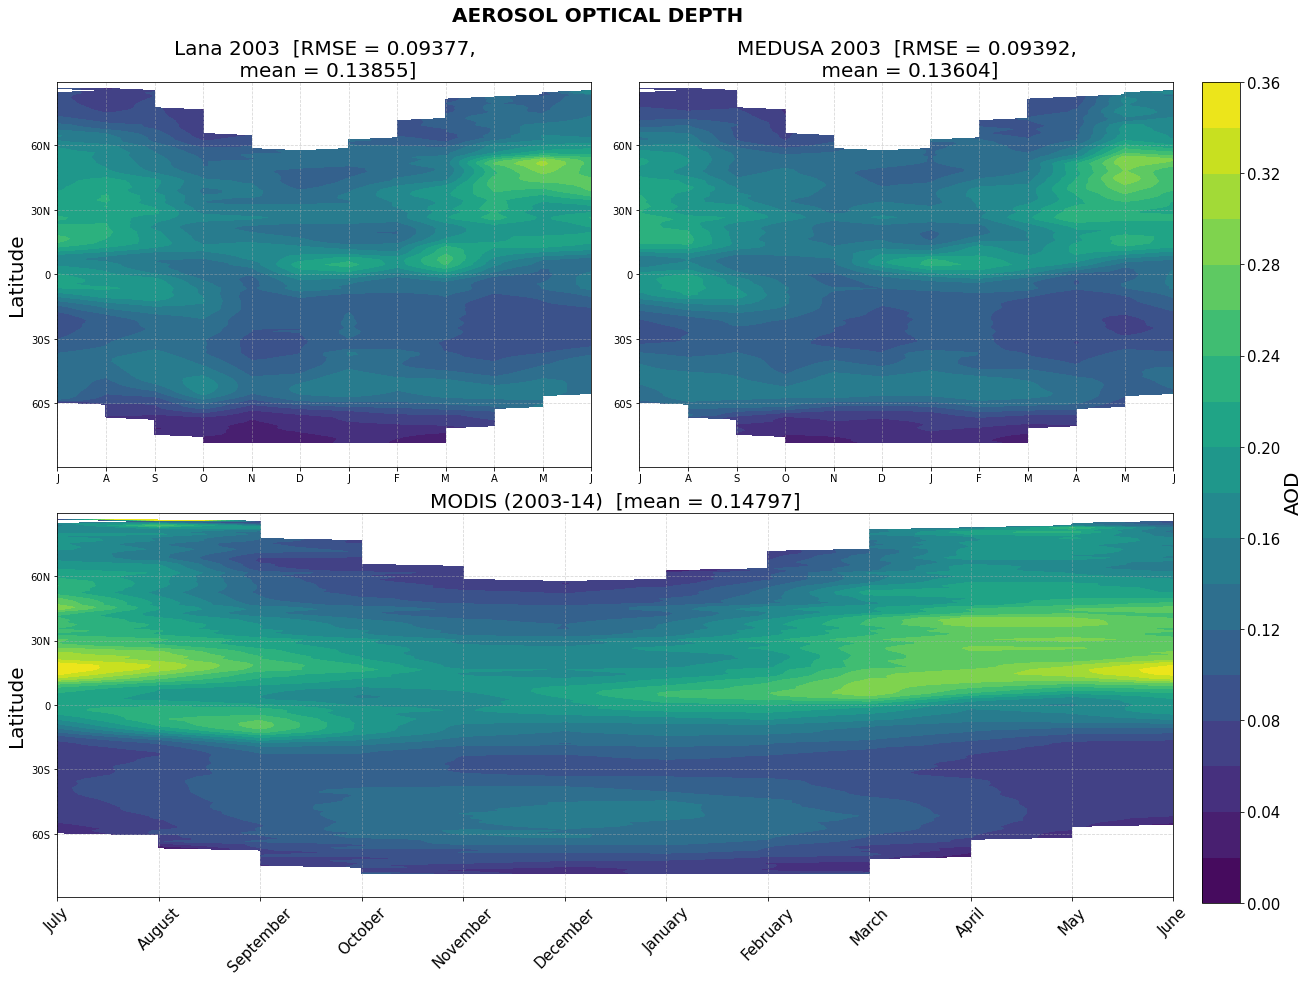

In [62]:
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana 2003','MEDUSA 2003','MODIS (2003-14)']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
#Date=np.array(Date)
DATE=np.concatenate((Dates[6:12],Dates[0:6]))
#np.concatenate((MODIS[6:12],MODIS[0:6]))
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.12, wspace=0.09)

ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2);ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

for ax,mapy,rmsey,titl,meany in  zip(axes,zonal_figs,rmse,title,mean):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['90S','60S','30S','0','30N','60N','90N']
    ax.yaxis.set_ticks(np.arange(-90,90,30))
    ax.set_yticklabels(y_labels)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(0.0,0.36+0.01,0.02)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        ax.contourf(DATE,lat_o,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(DATE,lat_o,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
    if titl == 'MODIS (2003-14)':
        ax.set_ylabel('Latitude',fontsize=20)

        cs=ax2.contourf(Dates,lat_o,mapy,clevs,cmap='viridis')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
cax = fig.add_axes([0.92, 0.12, 0.026, 0.76]) # Left, Bottom, Width, Height
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,0.6+0.04,0.04))
cbar.set_label('AOD',fontsize=20)
cbar.ax.tick_params(labelsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH',y=.95,fontsize=20,fontweight='bold')

plt.show()
#plt.savefig("Zonal_Lana_MEDUSA_Plot_AOD",dpi=600,bbox_inches = 'tight')


In [63]:
#Zonal Difference:
zonal_diff=medusa_zonal-lana_zonal; zonal_diff_lana=lana_zonal-modis_zonal; zonal_diff_medusa=medusa_zonal-modis_zonal
zonal_diff_figs=[zonal_diff_lana,zonal_diff_medusa,zonal_diff]


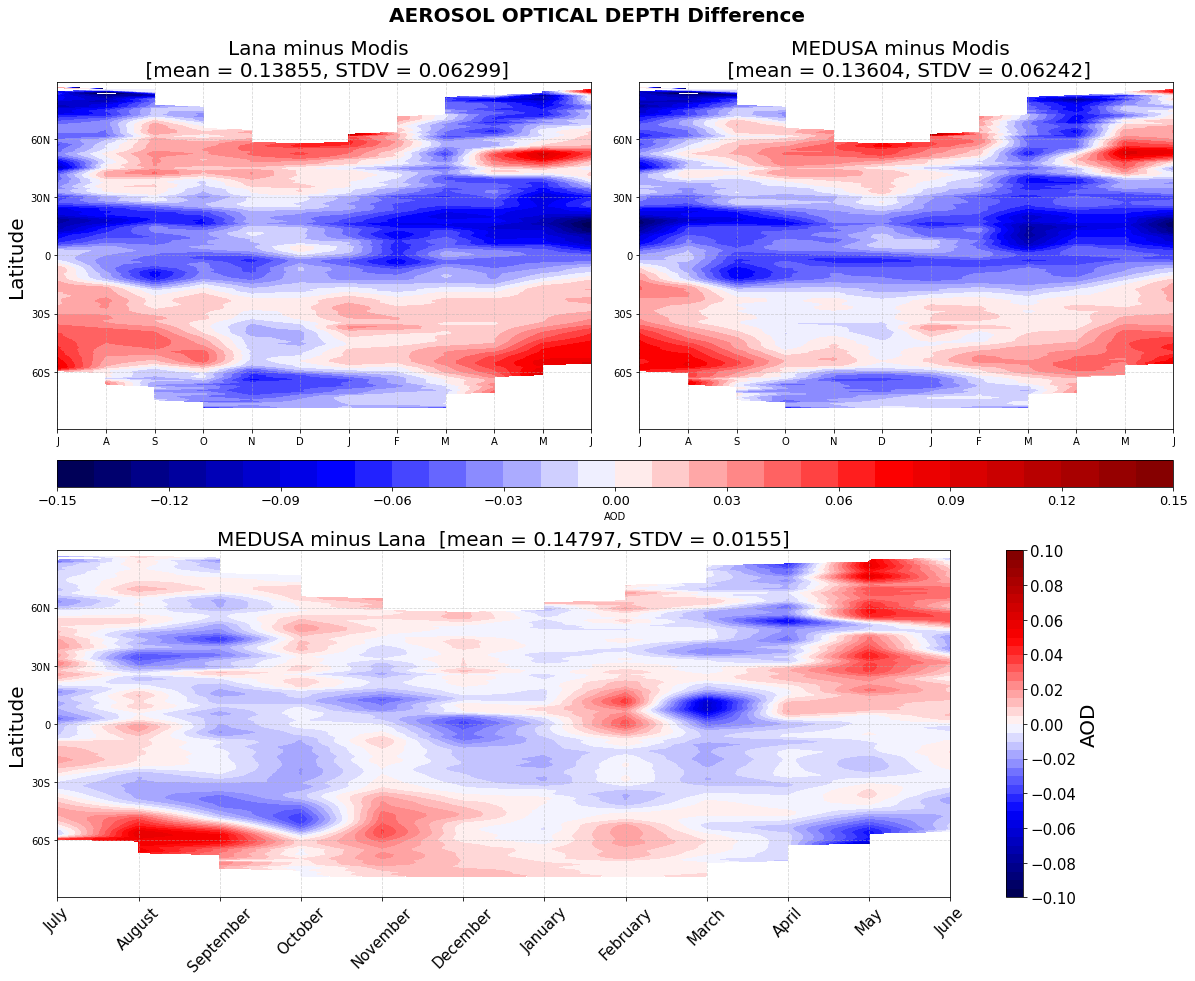

In [65]:
######################## FIGURE 4 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana minus Modis','MEDUSA minus Modis','MEDUSA minus Lana', ]
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
DATE=np.concatenate((Dates[6:12],Dates[0:6]))

DMS_std=np.nanstd(DMS_diff); lana_std=np.nanstd(lana_diff); medusa_std=np.nanstd(medusa_diff)
diff_std=[lana_std,medusa_std,DMS_std]

lana_dif_mean=areaweight(lana_diff,lat_o); medusa_diff_mean=areaweight(medusa_diff,lat_o); dms_diff_mean=areaweight(DMS_diff,lat_o)
diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.09)

ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-1, midpoint=0.0, stop=1, name='shifted')
for ax,mapy,rmsey,titl,meany,stdv in  zip(axes,zonal_diff_figs,rmse,title,mean,diff_std):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['90S','60S','30S','0','30N','60N','90N']
    ax.yaxis.set_ticks(np.arange(-90,90,30))
    ax.set_yticklabels(y_labels)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(-0.15,0.15+0.01,0.01)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana minus Modis':
   #     mapy[mapy>0.15]=0.15; mapy[mapy<-0.15]=-0.15
        cs=ax.contourf(DATE,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax.set_title("{}  \n [mean = {}, STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA minus Modis':
    #    mapy[mapy>0.15]=0.15; mapy[mapy<-0.15]=-0.15
        ax1.contourf(DATE,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax1.set_title("{}  \n [mean = {}, STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
    if titl == 'MEDUSA minus Lana':
        clevs1=np.arange(-0.10,0.10+0.005,0.005)
        ax.set_ylabel('Latitude',fontsize=20)
        cs1=ax2.contourf(Dates,lat_o,mapy,clevs1,cmap=shifted_cmap_dms)
        ax2.set_title("{}  [mean = {}, STDV = {}]".format(titl,round(meany,5),round(stdv,5)),fontsize=20)
#plt.tick_params(labelsize=20)
# cax = fig.add_axes([0.92, 0.12, 0.026, 0.76]) # Left, Bottom, Width, Height
# cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,0.6+0.04,0.04))
# cbar.set_label('AOD',fontsize=20)
# cbar.ax.tick_params(labelsize=15)

cax = fig.add_axes([0.125, 0.505, 0.775, 0.025]) # Left, Bottom, Width, Height
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-0.3,0.2+0.03,0.03))
cbar.ax.tick_params(labelsize=13); cbar.set_label('AOD',fontsize=10)

cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-0.1,0.1+0.02,0.02))
cbar.set_label('AOD',fontsize=20); cbar.ax.tick_params(labelsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH Difference',y=.95,fontsize=20,fontweight='bold')

plt.show()
#plt.savefig("plots/DMS_conc/Zonal_Lana_MEDUSA_Difference_Plot_AOD",dpi=600,bbox_inches = 'tight')


In [66]:
zonal_lana_rela_diff=((lana_zonal/modis_zonal)-1)*100
zonal_medusa_rela_diff=((medusa_zonal/modis_zonal)-1)*100
zonal_DMS_rela_diff=((medusa_zonal/lana_zonal)-1)*100
zonal_rela_diff=[zonal_lana_rela_diff,zonal_medusa_rela_diff,zonal_DMS_rela_diff]

lana_dif_mean=np.nanmean(zonal_lana_rela_diff)
medusa_diff_mean=np.nanmean(zonal_medusa_rela_diff)
dms_diff_mean=np.nanmean(zonal_DMS_rela_diff)
rela_diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

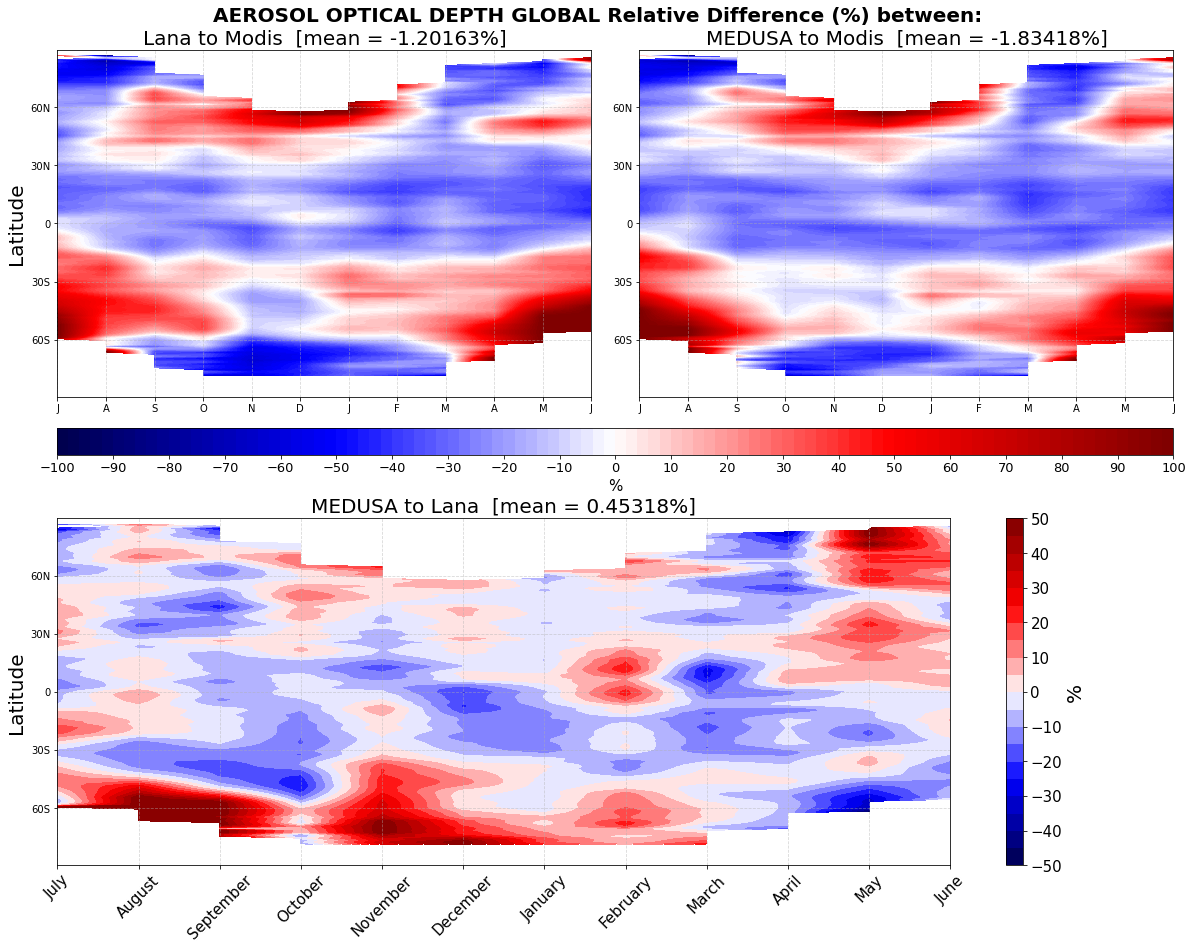

In [67]:
######################## FIGURE 6 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
DATE=np.concatenate((Dates[6:12],Dates[0:6]))

title=['Lana to Modis','MEDUSA to Modis','MEDUSA to Lana', ]

fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.09)

ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-1, midpoint=0.0, stop=1, name='shifted')
for ax,mapy,rmsey,titl,meany,stdv in  zip(axes,zonal_rela_diff,rmse,title,rela_diff_mean,diff_std):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['90S','60S','30S','0','30N','60N','90N']
    ax.yaxis.set_ticks(np.arange(-90,90,30)); ax.set_yticklabels(y_labels)

    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    clevs=np.arange(-100,100+2,2)

    if titl == 'Lana to Modis':
        mapy[mapy>100]=100; mapy[mapy<-100]=-100
        cs=ax.contourf(DATE,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA to Modis':
        mapy[mapy>100]=100; mapy[mapy<-100]=-100
        ax1.contourf(DATE,lat_o,mapy,clevs,cmap=shifted_cmap_modis)
        ax1.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA to Lana':
        mapy[mapy>50]=50; mapy[mapy<-50]=-50
        clevs1=np.arange(-50,50+5,5)
        ax.set_ylabel('Latitude',fontsize=20)
        cs1=ax2.contourf(Dates,lat_o,mapy,clevs1,cmap=shifted_cmap_dms)
        ax2.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)  

cax = fig.add_axes([0.125, 0.505, 0.775, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-100,100+10,10))
cbar.ax.tick_params(labelsize=13); cbar.set_label('%',fontsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH GLOBAL Relative Difference (%) between:',y=.92,fontsize=20,fontweight='bold')
cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-50,50+10,10))
cbar.set_label('%',fontsize=20); cbar.ax.tick_params(labelsize=15)

plt.show()
#plt.savefig("plots/DMS_conc/Zonal_Lana_MEDUSA_Relative_Difference_Plot_AOD",dpi=600,bbox_inches = 'tight')


# SOUTHERN OCEAN 

In [294]:
### MEAN FOR THE SH REGIONAL zonal
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aod_sh,lat_m_so))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aod_sh,lat_m_so))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis_sh,lat_so))
sh_mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]

RMSE_SH=[rms_lana_sh,rms_medusa_sh,0]
sh_data=[lana_sh,medusa_sh,modis_sh]

modis_concatenate_sh=np.concatenate((modis_sh[6:12],modis_sh[0:6])); lana_concatenate_sh=np.concatenate((lana_sh[6:12],lana_sh[0:6]));
medusa_concatenate_sh=np.concatenate((medusa_sh[6:12],medusa_sh[0:6]))

modis_zonal=np.nanmean(modis_concatenate_sh,axis=2); lana_zonal=np.nanmean(lana_concatenate_sh,axis=2);
medusa_zonal=np.nanmean(medusa_concatenate_sh,axis=2)

modis_zonal=modis_zonal.transpose(1,0);lana_zonal=lana_zonal.transpose(1,0);medusa_zonal=medusa_zonal.transpose(1,0);
zonal_figs=[lana_zonal,medusa_zonal,modis_zonal]

<ipython-input-294-14a88eeb0eb4>:13: RuntimeWarning: Mean of empty slice
  modis_zonal=np.nanmean(modis_concatenate_sh,axis=2); lana_zonal=np.nanmean(lana_concatenate_sh,axis=2);
<ipython-input-294-14a88eeb0eb4>:14: RuntimeWarning: Mean of empty slice
  medusa_zonal=np.nanmean(medusa_concatenate_sh,axis=2)


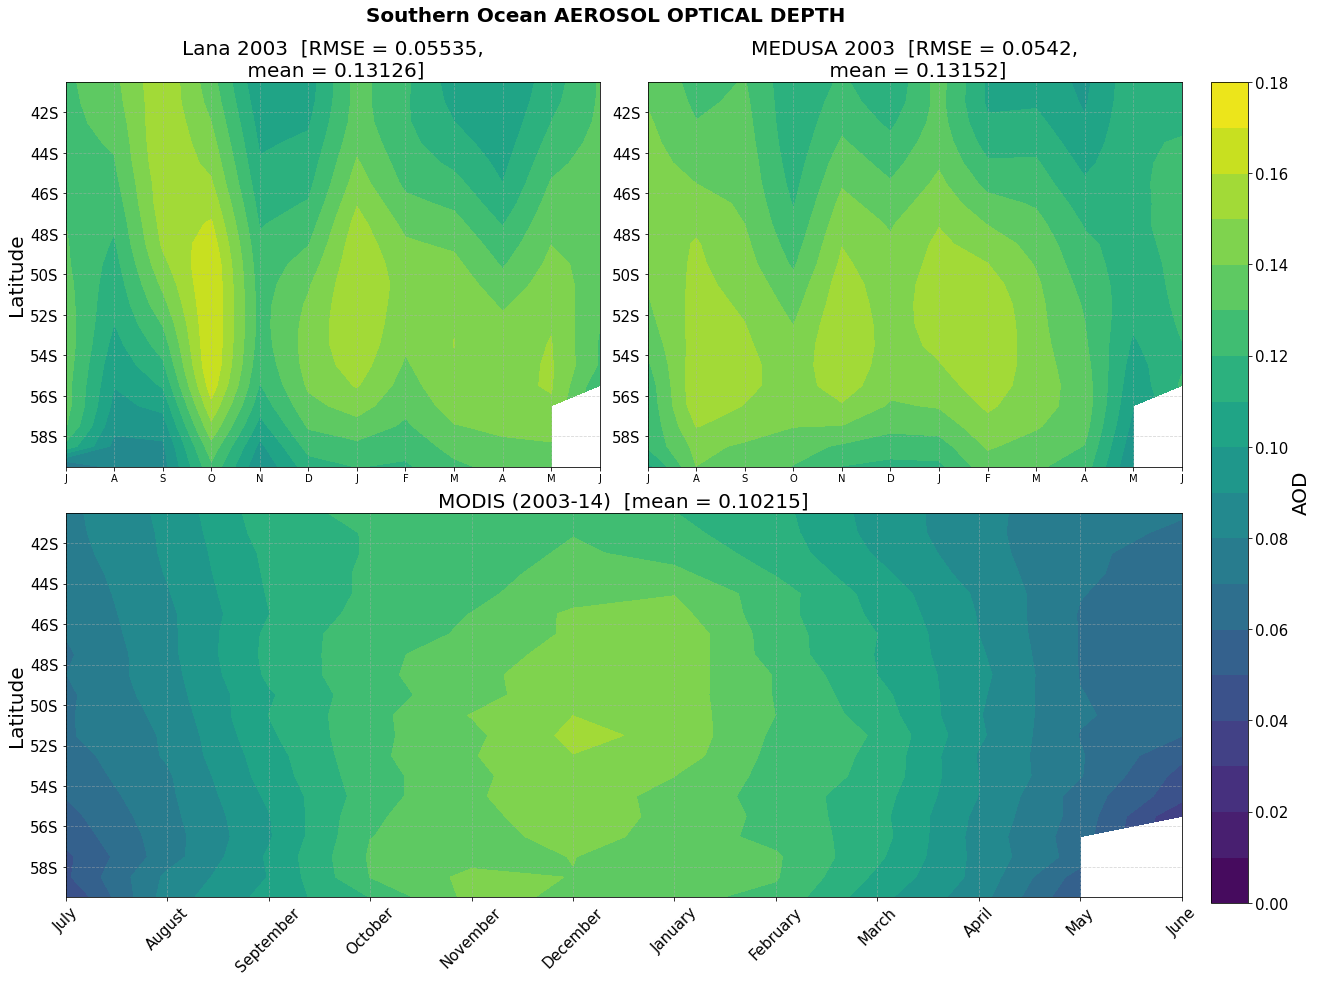

In [304]:
######################## FIGURE 1 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana 2003','MEDUSA 2003','MODIS (2003-14)']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
#Date=np.array(Date)
DATE=np.concatenate((Dates[6:12],Dates[0:6]))
#np.concatenate((MODIS[6:12],MODIS[0:6]))
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.12, wspace=0.09)

ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2);ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

for ax,mapy,rmsey,titl,meany in  zip(axes,zonal_figs,RMSE_SH,title,sh_mean):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['60S','58S','56S','54S','52S','50S','48S','46S','44S','42S','40S']
    ax.yaxis.set_ticks(np.arange(-60,-40+2,2))
    ax.set_yticklabels(y_labels,fontsize=15)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(0.0,0.17+0.02,0.01)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        mapy[mapy>0.17]=0.17; mapy[mapy<-100]=-100
        ax.contourf(DATE,lat_so,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(DATE,lat_so,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [RMSE = {},\n mean = {}]".format(titl,round(rmsey,5),round(meany,5)),fontsize=20)
    if titl == 'MODIS (2003-14)':
        ax.set_ylabel('Latitude',fontsize=20)

        cs=ax2.contourf(Dates,lat_so,mapy,clevs,cmap='viridis')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
cax = fig.add_axes([0.92, 0.12, 0.026, 0.76]) # Left, Bottom, Width, Height
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,0.18+0.02,0.02))
cbar.set_label('AOD',fontsize=20)
cbar.ax.tick_params(labelsize=15)
fig.suptitle('Southern Ocean AEROSOL OPTICAL DEPTH',y=.95,fontsize=20,fontweight='bold')

#plt.show()
plt.savefig("plots/DMS_conc/Southern_Ocean_Zonal_Lana_MEDUSA_Plot_AOD",dpi=600,bbox_inches = 'tight')

In [305]:
#Zonal SH Difference:
zonal_diff=medusa_zonal-lana_zonal; zonal_diff_lana=lana_zonal-modis_zonal; zonal_diff_medusa=medusa_zonal-modis_zonal
zonal_diff_figs=[zonal_diff_lana,zonal_diff_medusa,zonal_diff,modis_zonal]
sh_mean=[(areaweight(zonal_diff_lana,lat_so)),(areaweight(zonal_diff_medusa,lat_so)),(areaweight(zonal_diff,lat_so))
         ,MODIS_AREAWEIGHT_MEAN]
RMSE_SH=[rms_lana_sh,rms_medusa_sh,0,0]
sh_data=[lana_sh,medusa_sh,modis_sh,0]

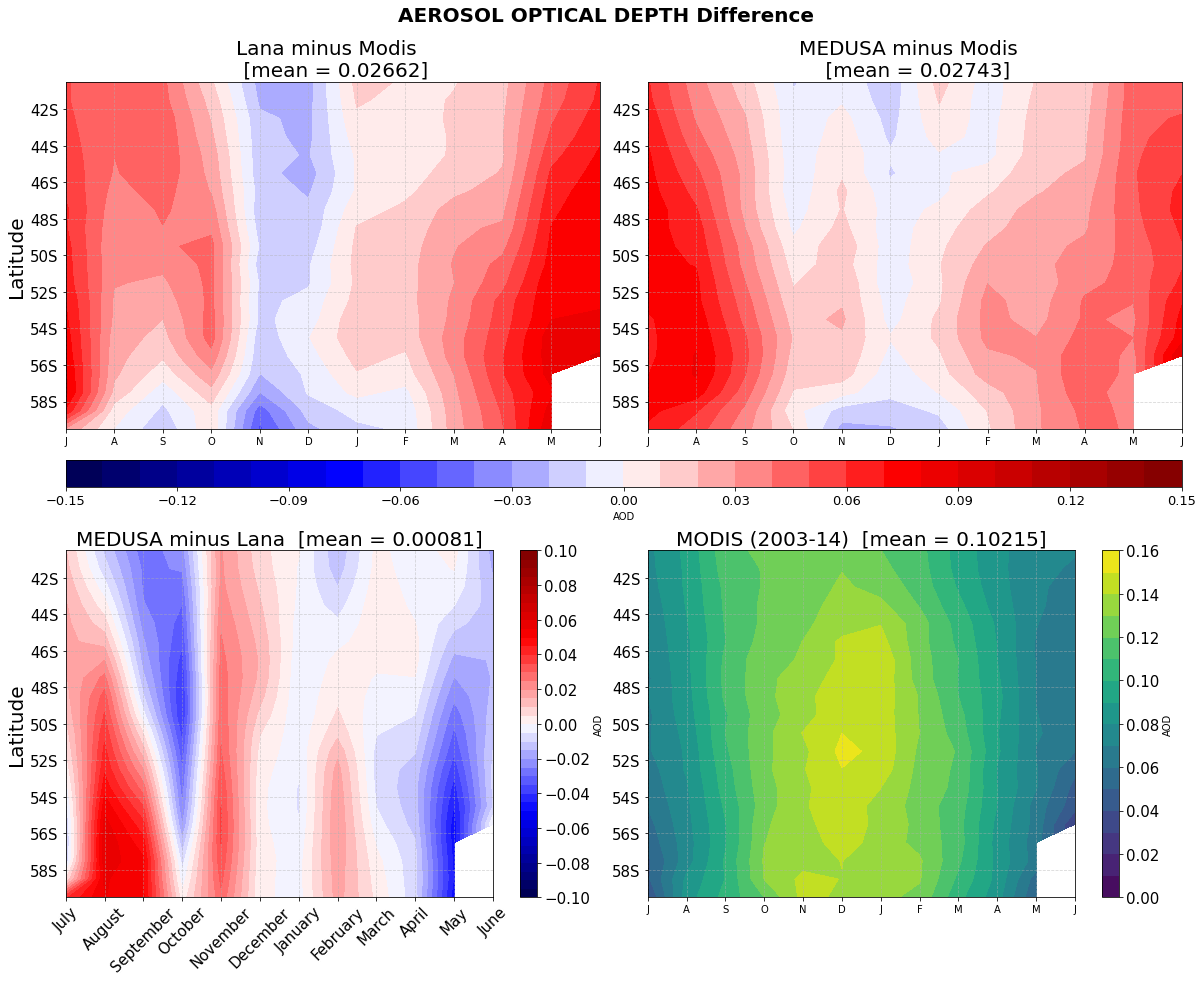

In [307]:
######################## FIGURE 4 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana minus Modis','MEDUSA minus Modis','MEDUSA minus Lana','MODIS (2003-14)' ]
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
DATE=np.concatenate((Dates[6:12],Dates[0:6]))

DMS_std=np.nanstd(DMS_diff); lana_std=np.nanstd(lana_diff); medusa_std=np.nanstd(medusa_diff)
diff_std=[lana_std,medusa_std,DMS_std]

lana_dif_mean=areaweight(lana_diff,lat_o); medusa_diff_mean=areaweight(medusa_diff,lat_o); dms_diff_mean=areaweight(DMS_diff,lat_o)
diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.09)

ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3); ax3=fig.add_subplot(2,2,4)
axes=[ax,ax1,ax2,ax3]

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-1, midpoint=0.0, stop=1, name='shifted')
for ax,mapy,rmsey,titl,meany in  zip(axes,zonal_diff_figs,RMSE_SH,title,sh_mean):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['60S','58S','56S','54S','52S','50S','48S','46S','44S','42S','40S']
    ax.yaxis.set_ticks(np.arange(-60,-40+2,2))
    ax.set_yticklabels(y_labels,fontsize=15)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(-0.15,0.15+0.01,0.01)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana minus Modis':
    #    mapy[mapy>0.20]=0.20; mapy[mapy<-0.20]=-0.20
        cs=ax.contourf(DATE,lat_so,mapy,clevs,cmap=shifted_cmap_modis)
        ax.set_title("{}  \n [mean = {}]".format(titl,round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA minus Modis':
     #   mapy[mapy>0.20]=0.20; mapy[mapy<-0.20]=-0.20
        ax1.contourf(DATE,lat_so,mapy,clevs,cmap=shifted_cmap_modis)
        ax1.set_title("{}  \n [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA minus Lana':
        clevs1=np.arange(-0.10,0.10+0.005,0.005)
        ax.set_ylabel('Latitude',fontsize=20)
        cs1=ax2.contourf(Dates,lat_so,mapy,clevs1,cmap=shifted_cmap_dms)
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MODIS (2003-14)':
        clevs=np.arange(0.0,0.15+0.02,0.01)
        cs2=ax3.contourf(Dates,lat_so,mapy,clevs,cmap='viridis')
        ax3.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
# cax = fig.add_axes([0.92, 0.12, 0.026, 0.76]) # Left, Bottom, Width, Height
# cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='vertical',ticks = np.arange(0,0.6+0.04,0.04))
# cbar.set_label('AOD',fontsize=20)
# cbar.ax.tick_params(labelsize=15)


cax = fig.add_axes([0.125, 0.505, 0.775, 0.025]) # Left, Bottom, Width, Height
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-0.3,0.2+0.03,0.03))
cbar.ax.tick_params(labelsize=13); cbar.set_label('AOD',fontsize=10)

cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-0.1,0.1+0.02,0.02))
cbar.set_label('AOD',fontsize=10); cbar.ax.tick_params(labelsize=15)

cbar=fig.colorbar(cs2, ax=ax3,extend='both',orientation='vertical',ticks = np.arange(0,0.16+0.02,0.02))
cbar.set_label('AOD',fontsize=10); cbar.ax.tick_params(labelsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH Difference',y=.95,fontsize=20,fontweight='bold')

#plt.show()
plt.savefig("plots/DMS_conc/Southern_Ocean_Zonal_Lana_MEDUSA_Difference_Plot_AOD",dpi=600,bbox_inches = 'tight')


In [309]:
zonal_lana_rela_diff=((lana_zonal/modis_zonal)-1)*100
zonal_medusa_rela_diff=((medusa_zonal/modis_zonal)-1)*100
zonal_DMS_rela_diff=((medusa_zonal/lana_zonal)-1)*100
zonal_rela_diff=[zonal_lana_rela_diff,zonal_medusa_rela_diff,zonal_DMS_rela_diff]

lana_dif_mean=np.nanmean(zonal_lana_rela_diff)
medusa_diff_mean=np.nanmean(zonal_medusa_rela_diff)
dms_diff_mean=np.nanmean(zonal_DMS_rela_diff)
rela_diff_mean=[lana_dif_mean,medusa_diff_mean,dms_diff_mean]

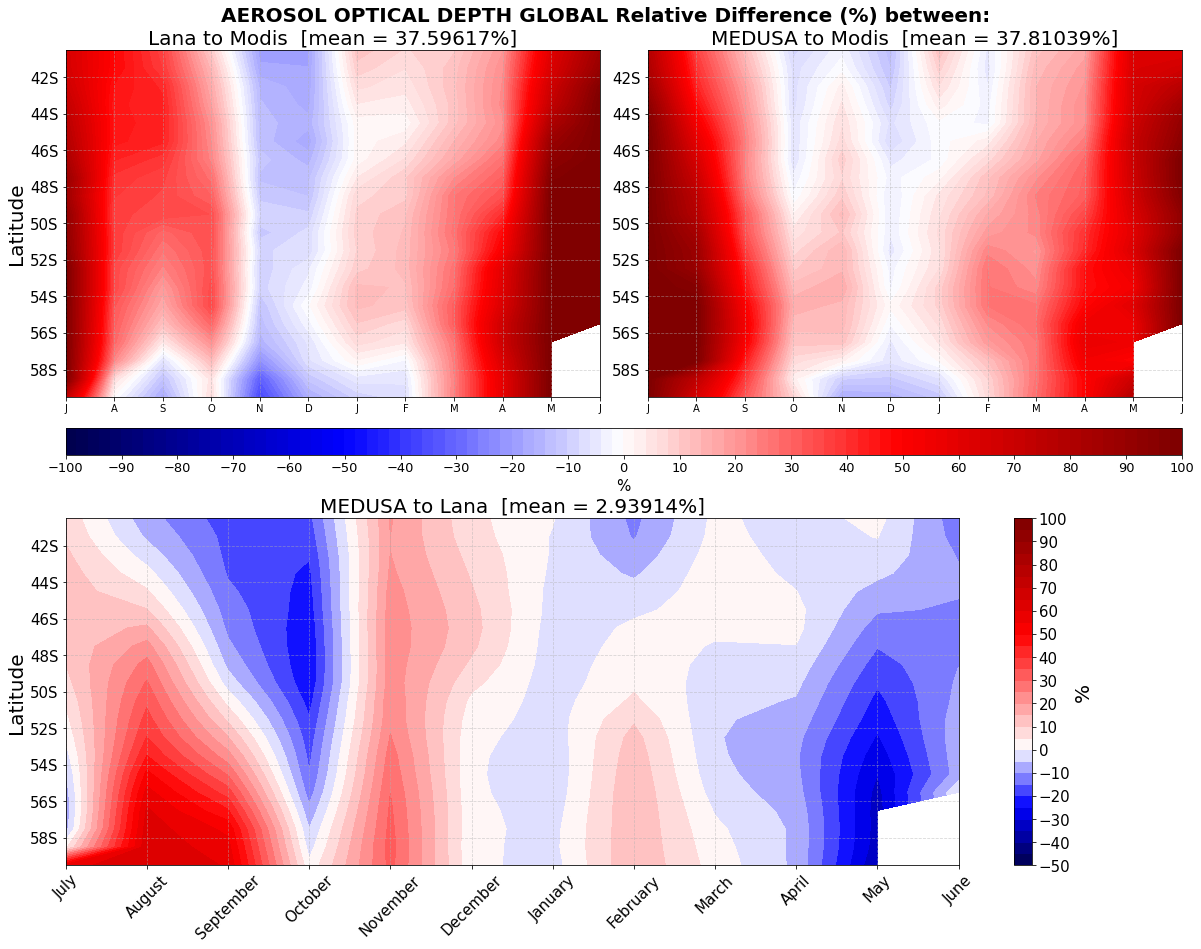

In [310]:
######################## FIGURE 6 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
DATE=np.concatenate((Dates[6:12],Dates[0:6]))

title=['Lana to Modis','MEDUSA to Modis','MEDUSA to Lana', ]

fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.09)

ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.34, stop=1, name='shifted')
for ax,mapy,rmsey,titl,meany,stdv in  zip(axes,zonal_rela_diff,rmse,title,rela_diff_mean,diff_std):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['60S','58S','56S','54S','52S','50S','48S','46S','44S','42S','40S']
    ax.yaxis.set_ticks(np.arange(-60,-40+2,2))
    ax.set_yticklabels(y_labels,fontsize=15)

    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    clevs=np.arange(-100,100+2,2)

    if titl == 'Lana to Modis':
        mapy[mapy>100]=100; mapy[mapy<-100]=-100
        cs=ax.contourf(DATE,lat_so,mapy,clevs,cmap=shifted_cmap_modis)
        ax.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA to Modis':
        mapy[mapy>100]=100; mapy[mapy<-100]=-100
        ax1.contourf(DATE,lat_so,mapy,clevs,cmap=shifted_cmap_modis)
        ax1.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA to Lana':
       # mapy[mapy>50]=50; mapy[mapy<-50]=-50
        clevs1=np.arange(-50,100+5,5)
        ax.set_ylabel('Latitude',fontsize=20)
        cs1=ax2.contourf(Dates,lat_so,mapy,clevs1,cmap=shifted_cmap_dms)
        ax2.set_title("{}  [mean = {}%]".format(titl,round(meany,5)),fontsize=20)  

cax = fig.add_axes([0.125, 0.505, 0.775, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(-100,100+10,10))
cbar.ax.tick_params(labelsize=13); cbar.set_label('%',fontsize=15)
fig.suptitle('AEROSOL OPTICAL DEPTH GLOBAL Relative Difference (%) between:',y=.92,fontsize=20,fontweight='bold')
cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-50,100+10,10))
cbar.set_label('%',fontsize=20); cbar.ax.tick_params(labelsize=15)

#plt.show()
plt.savefig("plots/DMS_conc/Southern_Ocean_Zonal_Lana_MEDUSA_Relative_Difference_Plot_AOD",dpi=600,bbox_inches = 'tight')

In [334]:
### LINES ###
s_weighted_area=[areaweight(lana_sh,lat_so),areaweight(medusa_sh,lat_so), areaweight(modis_sh,lat_so)]
area=[areaweight(lana_aerosol,lat),areaweight(MEDUSA_aerosol,lat),areaweight(modis,lat_o)]

s_area=[areaweight(lana_aod_sh,lat_m_so),areaweight(MEDUSA_aod_sh,lat_m_so), areaweight(modis_sh,lat_so)]
sh_weighted_area=[]
sh_area=[]
global_area=[]
for i,x,l in zip(area,s_area,s_weighted_area):
    c=np.concatenate((i[6:12],i[0:6]))
    global_area.append(c)
    d=np.concatenate((x[6:12],x[0:6]))
    sh_area.append(d)
    m=np.concatenate((l[6:12],l[0:6]))
    sh_weighted_area.append(m)

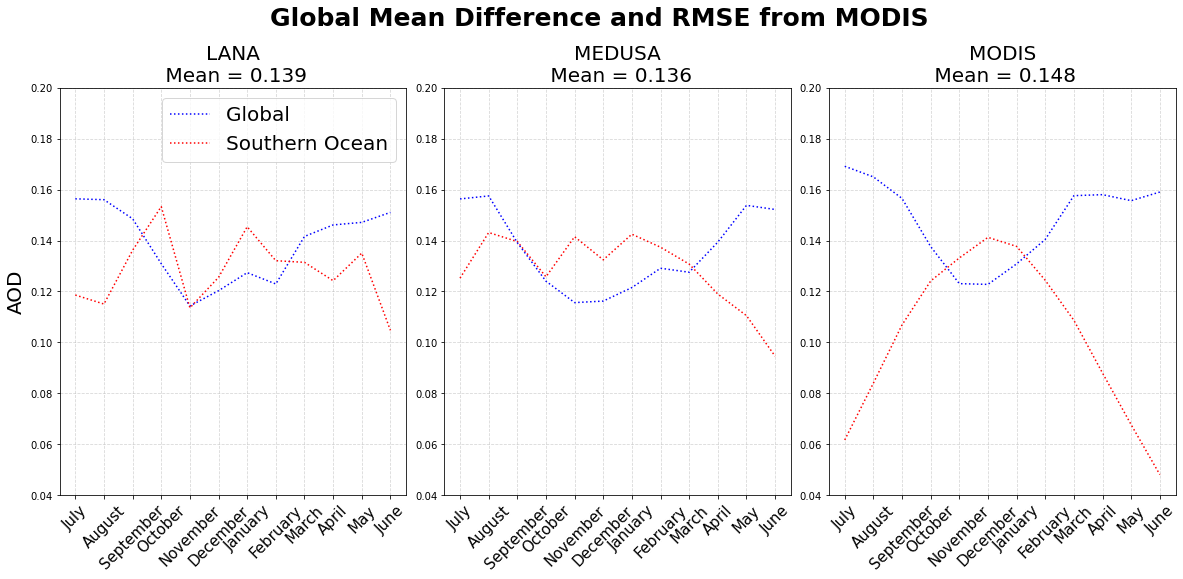

In [367]:
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0, wspace=0.11)
ax = fig.add_subplot(2,3,1); ax1 = fig.add_subplot(2,3,2); ax2 = fig.add_subplot(2,3,3)
axes=[ax,ax1,ax2]
#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(20,15))
#fig.subplots_adjust(hspace=0.2, wspace=0.1)

title=['LANA','MEDUSA','MODIS']
for axe,SH,GL,titl,meany in zip(axes,sh_weighted_area,global_area,title,mean):
    axe.grid(linestyle='--',alpha=0.5)
    axe.set_ylim([0.04,0.20])
   # ax.plot(Dates,SH,color='red',linestyle=':',label='Southern Ocean')
    #ax.plot(Dates,GL,linestyle=':',color='blue',label='Global ')

   # cs = ax.plot(Dates,DD,color='red',label='Southern Ocean')
   # ax.plot(Dates,GD,color='blue',label='Global')
    x=np.arange(0,12,1)
    axe.set_xticks(x)
    axe.set_xticklabels(DATE,fontsize=15,rotation=45)
    axe.set_title(titl+"\n Mean = {}".format(round(meany,3)),fontsize=20)
    plt.suptitle('Global Mean Difference and RMSE from MODIS',y=.955,fontsize=25,fontweight='bold')
    if titl == 'LANA':
        ax.set_ylabel('AOD',fontsize=20)
        ax.plot(DATE,GL,linestyle=':',color='blue',label='Global ')
        ax.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
    if titl == 'MEDUSA':
        ax1.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
        ax1.plot(DATE,GL,linestyle=':',color='blue',label='Global ')    
    if titl == 'MODIS':
        ax2.plot(DATE,GL,linestyle=':',color='blue',label='Global ')    
        ax2.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
    ax.legend(fontsize=20)

plt.show()
#plt.savefig("plots/DMS_conc/Southern_Ocean_test",dpi=600,bbox_inches = 'tight')